In [1]:
import sys, os, glob
import numpy as np
sys.path.insert(0, os.path.join(os.getcwd(), '..', '..'))
from ugradiolab.data.schema import load

DATA_DIR = 'data/lab2_hi_drift'
files = sorted(glob.glob(os.path.join(DATA_DIR, '*.npz')))
data = {}
for f in files:
    basename = os.path.basename(f)
    parts = basename.rsplit('_', 3)
    prefix = parts[0]
    data[prefix] = load(f)

# Convert I/Q to complex
def to_complex(raw):
    return raw[..., 0].astype(np.float64) + 1j * raw[..., 1].astype(np.float64)

print(f'Loaded {len(data)} files:')
for key, d in data.items():
    print(f'  {key}: alt={d["alt"].item()}, lst={d["lst"].item():.4f}, '
          f'jd={d["jd"].item():.6f}')

/Users/junruiting/GitHub/astron-121/.venv/lib/python3.12/site-packages/rtlsdr/__init__.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


dlsym(0x863b2910, rtlsdr_set_fir_coeffs): symbol not found
Loaded 9 files:
  HI-CAL-001: alt=90.0, lst=6.1938, jd=2461083.430960
  HI-CAL-002: alt=90.0, lst=6.2026, jd=2461083.432349
  HI-CAL-003: alt=90.0, lst=6.2113, jd=2461083.433738
  HI-CAL-004: alt=90.0, lst=6.2201, jd=2461083.435126
  HI-SKY-001: alt=90.0, lst=6.1951, jd=2461083.431159
  HI-SKY-002: alt=90.0, lst=6.2038, jd=2461083.432548
  HI-SKY-003: alt=90.0, lst=6.2126, jd=2461083.433938
  HI-SKY-004: alt=90.0, lst=6.2214, jd=2461083.435328
  HI-SKY-PRE: alt=90.0, lst=6.1936, jd=2461083.430928


In [2]:
import pandas as pd

def to_complex(raw):
    """Convert (nblocks, nsamples, 2) int8 I/Q to (nblocks, nsamples) complex128."""
    return raw[..., 0].astype(np.float64) + 1j * raw[..., 1].astype(np.float64)

rows = []
for prefix, f in data.items():
    is_cal = 'siggen_freq' in f
    rows.append({
        'prefix': prefix,
        'type': 'cal' if is_cal else 'obs',
        'samples': to_complex(f['data']),          # (10, 2048) complex128
        'sample_rate': f['sample_rate'].item(),
        'center_freq': f['center_freq'].item(),
        'gain': f['gain'].item(),
        'direct': f['direct'].item(),
        'unix_time': f['unix_time'].item(),
        'jd': f['jd'].item(),
        'lst': f['lst'].item(),
        'alt': f['alt'].item(),
        'az': f['az'].item(),
        'siggen_freq': f['siggen_freq'].item() if is_cal else np.nan,
        'siggen_amp': f['siggen_amp'].item() if is_cal else np.nan,
        'siggen_rf_on': f['siggen_rf_on'].item() if is_cal else False,
    })

df = pd.DataFrame(rows).sort_values('unix_time').reset_index(drop=True)
df

,prefix,type,samples,sample_rate,center_freq,gain,direct,unix_time,jd,lst,alt,az,siggen_freq,siggen_amp,siggen_rf_on
0,HI-SKY-PRE,obs,"[[6j, (-11+9j), (-9+0j), (4+5j), (-13-10j), (-...",2560000.0,1.420000e+09,0.0,False,1.770848e+09,2.461083e+06,6.193631,90.0,0.0,NaN,NaN,False
1,HI-CAL-001,cal,"[[(10-6j), (-3-3j), (2-5j), (-20+28j), (6-14j)...",2560000.0,1.420000e+09,0.0,False,1.770848e+09,2.461083e+06,6.193833,90.0,0.0,1.421206e+09,-35.0,True
2,HI-SKY-001,obs,"[[(-4-14j), -3j, (-3-23j), (2+2j), (-7-3j), (1...",2560000.0,1.420000e+09,0.0,False,1.770848e+09,2.461083e+06,6.195088,90.0,0.0,NaN,NaN,False
3,HI-CAL-002,cal,"[[(4-3j), (-3+0j), (19-2j), (-6+0j), (17+4j), ...",2560000.0,1.420000e+09,0.0,False,1.770849e+09,2.461083e+06,6.202584,90.0,0.0,1.421206e+09,-35.0,True
4,HI-SKY-002,obs,"[[(-6-6j), (2+10j), (-7-9j), (10+0j), (-16-10j...",2560000.0,1.420000e+09,0.0,False,1.770849e+09,2.461083e+06,6.203843,90.0,0.0,NaN,NaN,False
5,HI-CAL-003,cal,"[[(-7+10j), (6-11j), (-1+14j), -22j, 16j, (-12...",2560000.0,1.420000e+09,0.0,False,1.770849e+09,2.461083e+06,6.211334,90.0,0.0,1.421206e+09,-35.0,True
6,HI-SKY-003,obs,"[[(7-5j), (-15-5j), (5+8j), (-9+6j), (10-5j), ...",2560000.0,1.420000e+09,0.0,False,1.770849e+09,2.461083e+06,6.212598,90.0,0.0,NaN,NaN,False
7,HI-CAL-004,cal,"[[(11+15j), (2-22j), (7+18j), (-6-8j), (4-10j)...",2560000.0,1.420000e+09,0.0,False,1.770849e+09,2.461083e+06,6.220085,90.0,0.0,1.421206e+09,-35.0,True
8,HI-SKY-004,obs,"[[(15-4j), (-1+9j), (16+1j), (2+0j), (3-14j), ...",2560000.0,1.420000e+09,0.0,False,1.770849e+09,2.461083e+06,6.221353,90.0,0.0,NaN,NaN,False


In [3]:
[ np.min(sample) for sample in df["samples"] ]


[np.complex128(-36-2j),
 np.complex128(-46-4j),
 np.complex128(-48-10j),
 np.complex128(-44-6j),
 np.complex128(-46-12j),
 np.complex128(-44+6j),
 np.complex128(-48-4j),
 np.complex128(-47+13j),
 np.complex128(-46+3j)]

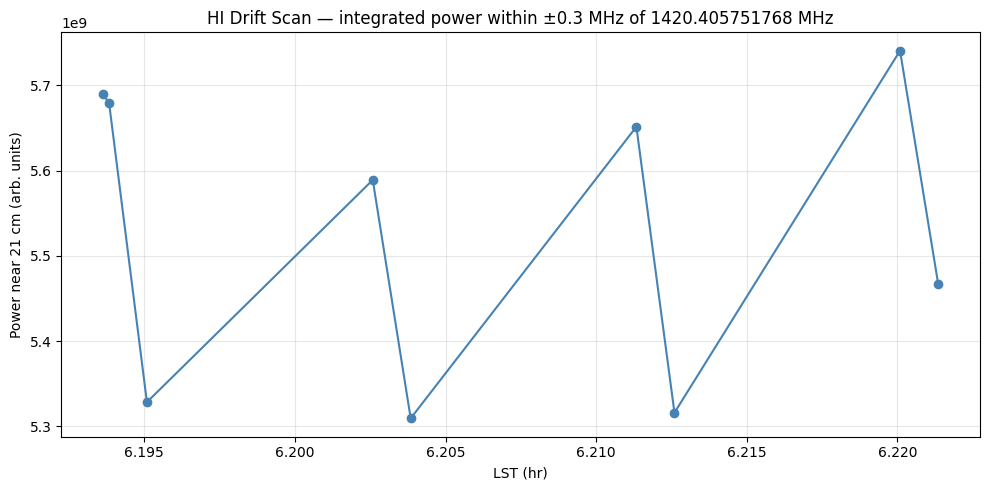

In [4]:
import matplotlib.pyplot as plt

HI_FREQ = 1420.405751768  # MHz

def power_spectrum(iq, sample_rate, center_freq):
    nblocks, nsamples = iq.shape
    fft_data = np.fft.fftshift(np.fft.fft(iq, axis=1), axes=1)
    psd = np.mean(np.abs(fft_data)**2, axis=0)
    freqs = np.fft.fftshift(np.fft.fftfreq(nsamples, d=1.0/sample_rate))
    freqs_mhz = (freqs + center_freq) / 1e6
    return freqs_mhz, psd

# Compute total power near HI line for each observation
hi_half_width = 0.3  # MHz window around HI line

lsts = []
powers = []
for _, row in df.iterrows():
    freqs_mhz, psd = power_spectrum(row['samples'], row['sample_rate'], row['center_freq'])
    mask = np.abs(freqs_mhz - HI_FREQ) < hi_half_width
    powers.append(np.sum(psd[mask]))
    lsts.append(row['lst'])

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lsts, powers, 'o-', color='steelblue', markersize=6)
ax.set_xlabel('LST (hr)')
ax.set_ylabel('Power near 21 cm (arb. units)')
ax.set_title(f'HI Drift Scan — integrated power within ±{hi_half_width} MHz of {HI_FREQ} MHz')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

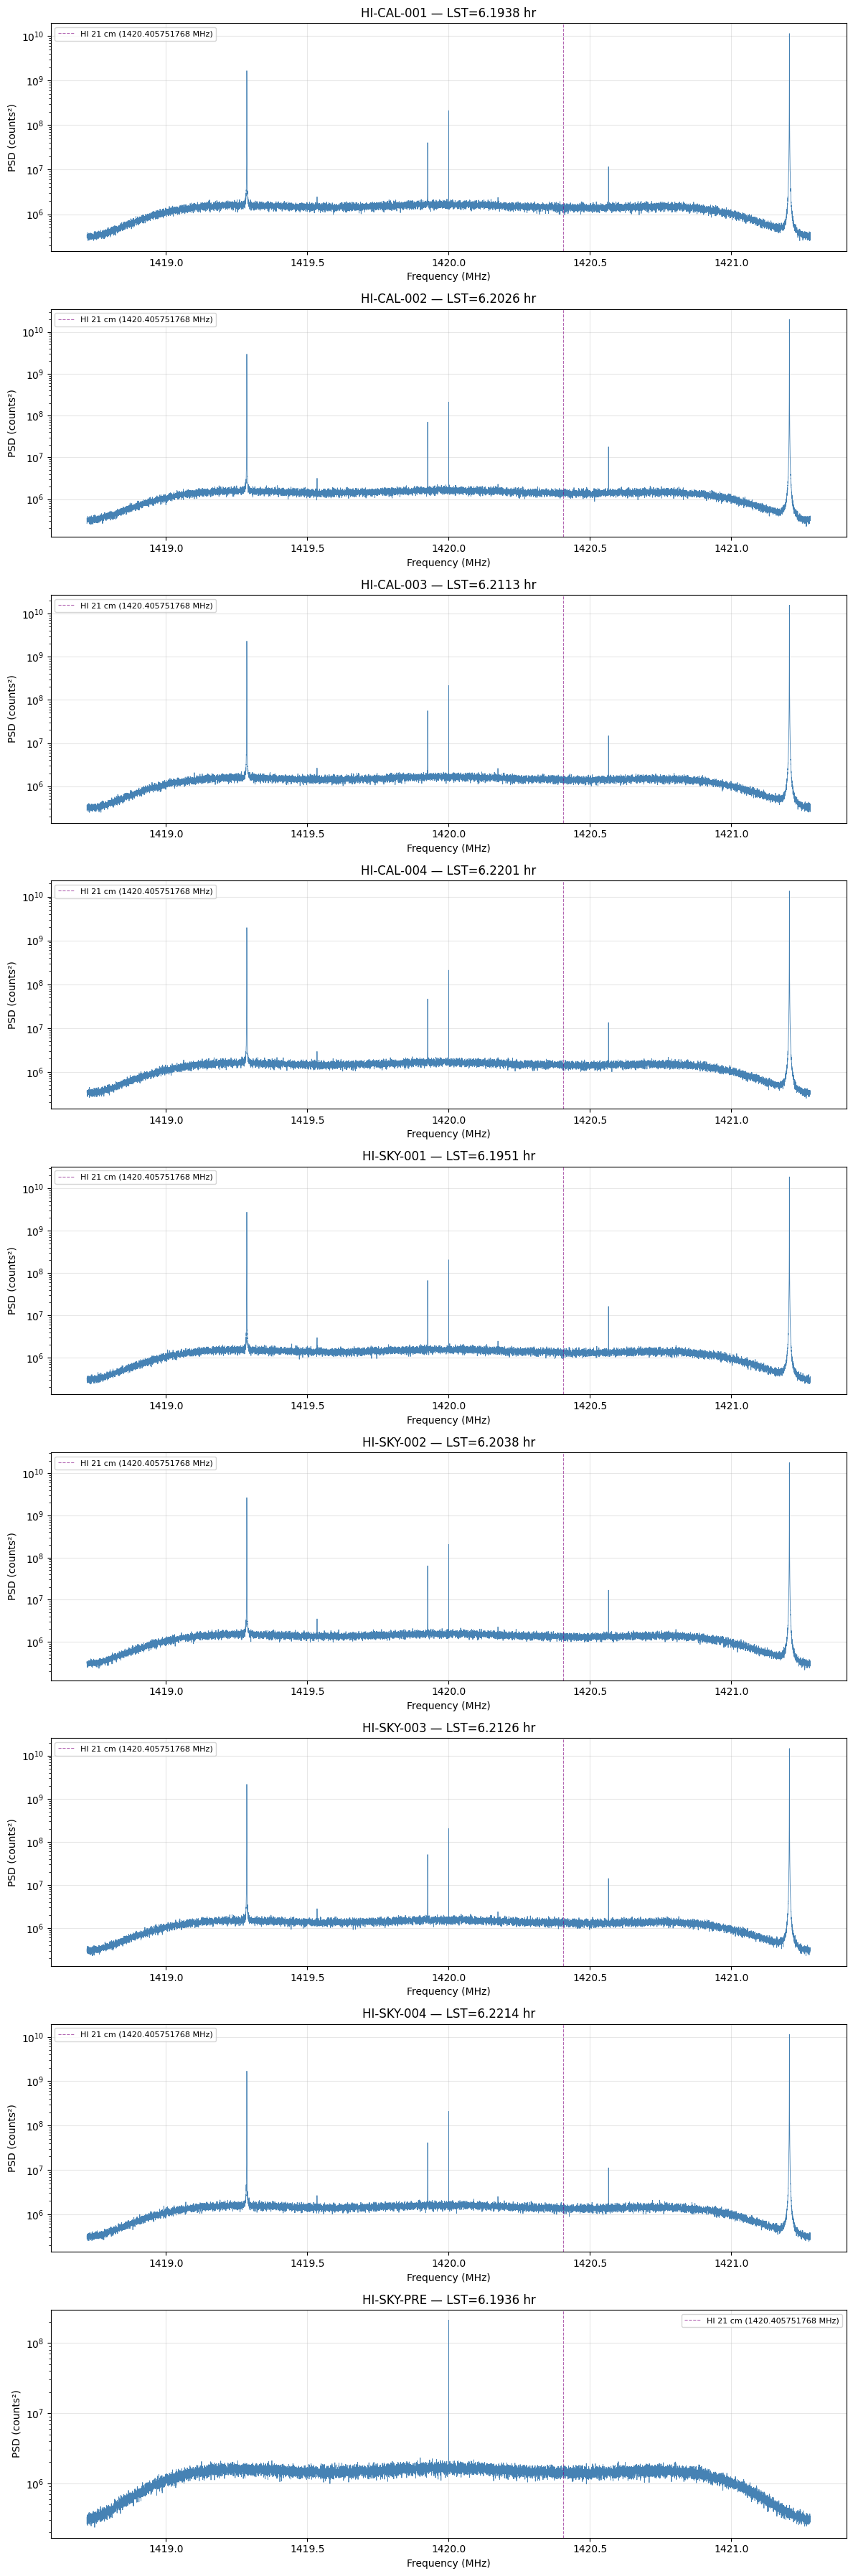

In [5]:
import matplotlib.pyplot as plt

HI_FREQ = 1420.405751768  # MHz

def power_spectrum(iq, sample_rate, center_freq):
    nblocks, nsamples = iq.shape
    fft_data = np.fft.fftshift(np.fft.fft(iq, axis=1), axes=1)
    psd = np.mean(np.abs(fft_data)**2, axis=0)
    freqs = np.fft.fftshift(np.fft.fftfreq(nsamples, d=1.0/sample_rate))
    freqs_mhz = (freqs + center_freq) / 1e6
    return freqs_mhz, psd

# Compute PSD for each capture
fig, axes = plt.subplots(len(data), 1, figsize=(12, 4*len(data)), squeeze=False)
for ax_row, (prefix, d) in zip(axes, data.items()):
    ax = ax_row[0]
    iq = to_complex(d['data'])
    freqs_mhz, psd = power_spectrum(iq, d['sample_rate'].item(), d['center_freq'].item())
    ax.semilogy(freqs_mhz, psd, lw=0.6, color='steelblue')
    ax.axvline(HI_FREQ, color='purple', alpha=0.6, lw=0.8, ls='--',
               label=f'HI 21 cm ({HI_FREQ} MHz)')
    ax.set_xlabel('Frequency (MHz)')
    ax.set_ylabel('PSD (counts²)')
    ax.set_title(f'{prefix} — LST={d["lst"].item():.4f} hr')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()